https://www.kaggle.com/code/songulerdem/car-sales-forecast-with-multi-layer-perceptron/notebook#Build-the-Model

In [148]:
import numpy as np
import pandas as pd

In [149]:
df_dataset = pd.read_csv("../Datasets/car sales.csv")

In [150]:
df_dataset.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [151]:
df_dataset.shape

(36, 2)

In [152]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   36 non-null     object
 1   Sales   36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 704.0+ bytes


In [153]:
import matplotlib.pyplot as plt

In [177]:
df_dataset.Month.dtype

dtype('<M8[ns]')

In [168]:
# train test split
df_train = df_dataset[:-6]
df_test = df_dataset[-6:]

In [169]:
df_dataset.Month = pd.to_datetime(df_dataset.Month, format="%Y-%m")

In [176]:
df_dataset.Month.dtype

dtype('<M8[ns]')

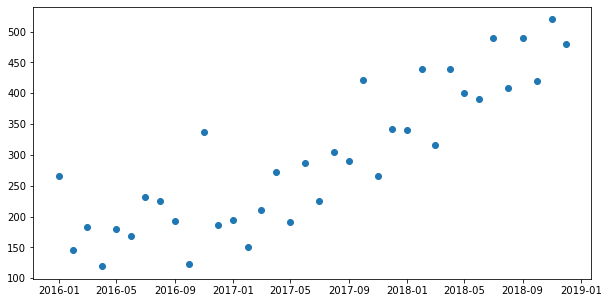

In [188]:
plt.figure(figsize=(10, 5))
plt.scatter(df_dataset.Month, df_dataset.Sales)
plt.show()

## sales forecast using linear regression using month and year data

In [189]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   30 non-null     object
 1   Sales   30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [190]:
# pandas data frame into numpy array
train = df_train.values
test = df_test.values

In [191]:
# convert time data into integer for linear regression

def time2int(npdata):
    # split date time
    datetime = np.char.split(npdata[:,0].astype(str), sep = '-')
    datetime = np.vstack(datetime)
    
    # year = datetime[:, 0].astype(int)
    # month = datetime[:, 1].astype(int)
    datetime = datetime.astype(int)
    
    return datetime

In [192]:
## train data 
X = time2int(train)
X = np.array(X, dtype='int')

Y = train[:, 1]
Y = np.array(Y, dtype='int')
Y = Y.reshape((-1,1))

## test data
Xt = time2int(test)
Xt = np.array(Xt, dtype='int')

Yt = test[:, 1]
Yt = np.array(Yt, dtype='int')
Yt = Yt.reshape((-1,1))

In [209]:
# implement linear regression
def hypothesis(X, W):
    if X.shape[1] != W.shape[0]:
        ones = np.ones((X.shape[0], 1))
        X = np.hstack((ones, X))
    Y_ = np.dot(X, W)
    return Y_

def cost(X, Y, W):
    Y_ = hypothesis(X, W)
    cost = np.mean((Y_ - Y)**2)
    return cost
    
def gradient(X, Y, W):
    Y_ = hypothesis(X, W)
    dW = np.dot(X.T, (Y_ - Y))
    return dW/X.shape[1]

def gradientDescent(X, Y, lr = 0.01, epochs = 300):
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))
    # print(X.shape)
    
    m = X.shape[0]
    n = X.shape[1]
    W = np.zeros((n, 1))
    
    loss = []
    l = cost(X, Y, W)
    loss.append(l)
    
    #print(hypothesis(X, W))
    for i in range(epochs):
        dW = gradient(X, Y, W)
        #print(dW)
        W = W - lr * dW
        
        #print(hypothesis(X, W))
        loss.append(cost(X, Y, W))
        # print(i, end="/r")
        
    return W, loss

In [228]:
def plot3D(X, Y, W):
    scatter = go.Scatter3d(x=list(X[:,0]), y=list(X[:, 1]), z=list(Y[:,0]),
                       mode='markers', marker=dict(size=4, color='red', opacity=0.8))

    # Create a hyperplane
    xx, yy = np.meshgrid(np.linspace(2000, 2020, 41), np.linspace(0,14, 14*6))
    xy = np.hstack((xx, yy))
    zz = W[0] + W[1]*xx + W[2]*yy
    surface = go.Surface(z=zz, x=list(X[:,0]), y=list(X[:, 1]), colorscale='Viridis', showscale=False)

    # Create a figure
    fig = go.Figure(data=[scatter, surface])

    # Update the layout
    fig.update_layout(scene = dict(
                    xaxis_title='X Label',
                    yaxis_title='Y Label',
                    zaxis_title='Z Label'))

    # Show the plot
    fig.show()

In [194]:
W, loss = gradientDescent(X, Y, 0.0000000001, 1000)

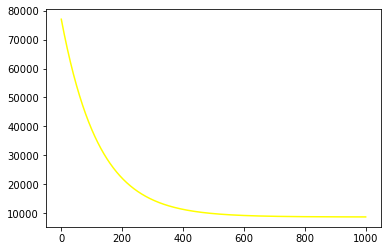

In [203]:
plt.plot(loss, c="yellow")

In [204]:
import plotly.graph_objects as go

In [229]:
plot3D(X, Y, W)

#### using sklearn

In [230]:
from sklearn.linear_model import LinearRegression

In [231]:
reg3D = LinearRegression()

In [273]:
reg3D.fit(X, Y.reshape((-1,)))

LinearRegression()

In [274]:
W3d = np.vstack((reg3D.intercept_.reshape((-1, 1)), reg3D.coef_.reshape((-1, 1))))

In [275]:
plot3D(X, Y, W3d)

## sales forecast using regression - month extrapolation

In [250]:
X_train = time2int(train)
X_train[12:24, 1] += 12
X_train[24:, 1] += 12

In [251]:
w, l = gradientDescent(X_train[:,1].reshape((-1, 1)), Y, 0.00001, 200)

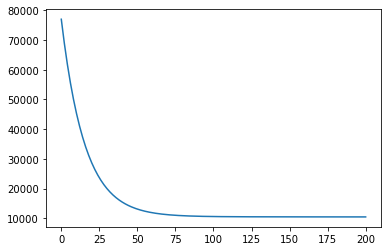

In [252]:
plt.plot(l)

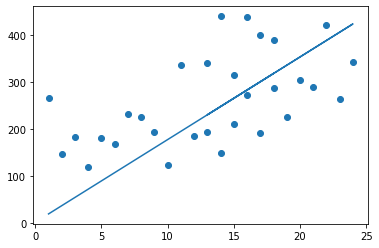

In [253]:
plt.scatter(X_train[:,1], Y)
plt.plot(X_train[:,1], hypothesis(Xn, w))
plt.show()

#### using sklearn

In [255]:
reg2d = LinearRegression()

In [262]:
reg2d.fit(X_train[:,1].reshape((-1,1)), Y)

LinearRegression()

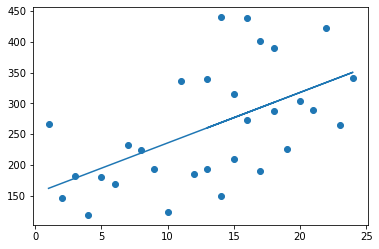

In [268]:
plt.scatter(X_train[:,1], Y)
plt.plot(X_train[:,1], hypothesis(Xn, np.vstack((reg2d.intercept_, reg2d.coef_))))
plt.show()

## sales forecast using multi-layer perceptron

In [ ]:
# convert month from object datatype to datatime datatype
df_dataset.Month = pd.to_datetime(df_dataset.Month, format="%Y-%m")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   30 non-null     object
 1   Sales   30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [ ]:
"""lag is a feature engineering concept to predict target values of future (t+x time) 
using values of present (t) time with a certain lag (x)"""

## https://datascience.stackexchange.com/a/72481

In [ ]:
# predicting futures sales using Lag

## used the code on Kaggle
def generate_lag(df, n):
    X, y = [], []
    for i in range(len(df) - n):
        X.append(df[i:i+n])
        y.append(df[n+i])
    
    return np.array(X), np.array(y), np.array(y[-n:]).reshape(1,n)

In [ ]:
# X, y, last_batch_values = generate_lag(df_train.Sales.values, 12)

In [32]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [98]:
lr.fit(X, Y)

In [36]:
lr.intercept_

array([-204973.04255319])

In [37]:
x = np.linspace(100, 450, 2)
y = np.linspace(100, 450, 200)
A, B = np.meshgrid(x, y)
C = np.vstack(((A, B)))


In [38]:
C.shape

(400, 2)

In [45]:
Y_ = lr.predict(X)

In [46]:
Y_

array([[140.34356103],
       [148.4181411 ],
       [156.49272116],
       [164.56730123],
       [172.6418813 ],
       [180.71646137],
       [188.79104143],
       [196.8656215 ],
       [204.94020157],
       [213.01478163],
       [221.0893617 ],
       [229.16394177],
       [242.08230683],
       [250.1568869 ],
       [258.23146697],
       [266.30604703],
       [274.3806271 ],
       [282.45520717],
       [290.52978723],
       [298.6043673 ],
       [306.67894737],
       [314.75352744],
       [322.8281075 ],
       [330.90268757],
       [343.82105263],
       [351.8956327 ],
       [359.97021277],
       [368.04479283],
       [376.1193729 ],
       [384.19395297]])

In [47]:
px.scatter_3d(x=list(X[:,0]), y=list(X[:, 1]), z=list(Y_[:,0]))

In [ ]:
# We can not feed time series data into machine learning model 

In [276]:
class MLP:
    # I am building a 3 layer (2 hidden + 1 output layer) neural network
    def __init__(self):
        ## we need to initalize weights and biases of each layer 
        model = {}
        
        model['W1'] = np.random.rand(input_neurons, hidden_neurons[0])
        model['b1'] = np.zeros((1, hidden_neurons[0]))
        
        model['W2'] = np.random.rand(hidden_neurons[0], hidden_neurons[1])
        model['b2'] = np.zeros((1, hidden_neurons[1]))
        
        model['W3'] = np.random()

#### time series analysis - car sales forecast

In [277]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [282]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   36 non-null     datetime64[ns]
 1   Sales   36 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 704.0 bytes


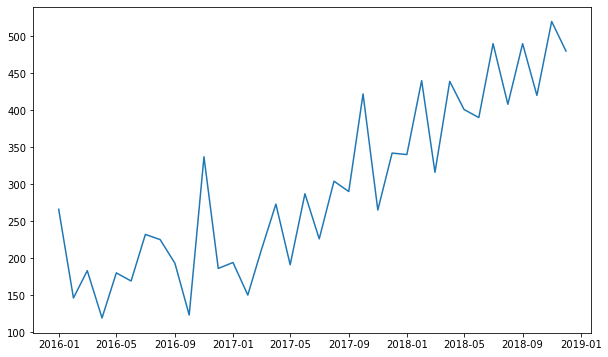

In [284]:
plt.figure(figsize=(10, 6))
plt.plot(df_dataset.Month, df_dataset.Sales)
plt.show()

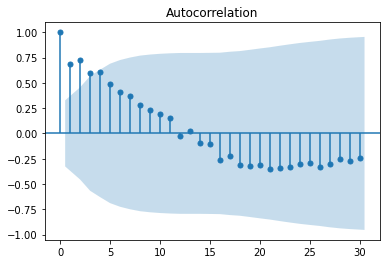

In [287]:
acf_plot = plot_acf(df_dataset.Sales, lags=30)

###### since the autocorrelation does not show decalying behaviour (decreasing value of correlation over lag), 
###### we are likely not dealing with Auto Regressive process

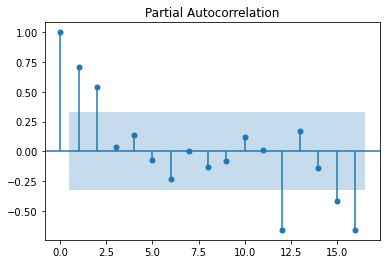

In [295]:
# let plot pacf for more confidence
pacf_plot = plot_pacf(df_dataset.Sales, lags = 16)

###### based on pacf , we can (and should) start with auto-regressive model with lags 1, 2, 12, 15, 16 (those correlation are high)

In [300]:
df_dataset.Sales[:-1]

0     266
1     146
2     183
3     119
4     180
5     169
6     232
7     225
8     193
9     123
10    337
11    186
12    194
13    150
14    210
15    273
16    191
17    287
18    226
19    304
20    290
21    422
22    265
23    342
24    340
25    440
26    316
27    439
28    401
29    390
30    490
31    408
32    490
33    420
34    520
Name: Sales, dtype: int64